In [9]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Image, display
import os, sys
from matplotlib.image import imread

names = ['Banana', 'Gaussian_Gamma_1', 'GermanCredit', 'Brownian', 'ItemResponseTheory', 'StochasticVolatility']

In [10]:
def pandas_matshow(df, x, y, z):

    # Pivot the DataFrame to create a grid
    pivot_table = df.pivot(index=y, columns=x, values=z)

    # Plotting the heatmap
    plt.imshow(pivot_table, cmap='viridis', aspect='auto')  # You can choose other colormaps
    plt.colorbar(label='grads to low bias')

    # Add labels
    plt.xticks(ticks=np.arange(len(pivot_table.columns)), labels=pivot_table.columns)
    plt.yticks(ticks=np.arange(len(pivot_table.index)), labels=pivot_table.index)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    

def pandas_show(df, x, y):
    plt.bar([str(val) for val in np.array(df[x])], np.array(df[y]))
    plt.ylabel('grads to low bias')
    plt.show()
    
def showw(*params):
    
    if len(params)==1:
        x = params[0]
        df = pd.read_csv('img/' + str(x) + '/data.csv', sep= '\t')

        for t in names:
            plt.title(t)
            pandas_show(df, x, 'grads_to_low_bmax_' + t)        
    
    elif len(params) == 2:
        x, y = params 
        df = pd.read_csv('img/' + str(x) + '_' + str(y) + '/data.csv', sep= '\t')

        for t in names:
            plt.title(t)
            pandas_matshow(df, x, y, 'grads_to_low_bmax_' + t)
    else:
        raise ValueError(f'{len(params)} is not implemented.')

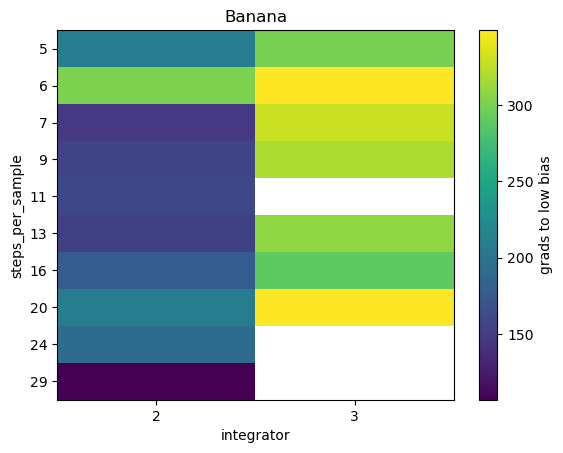

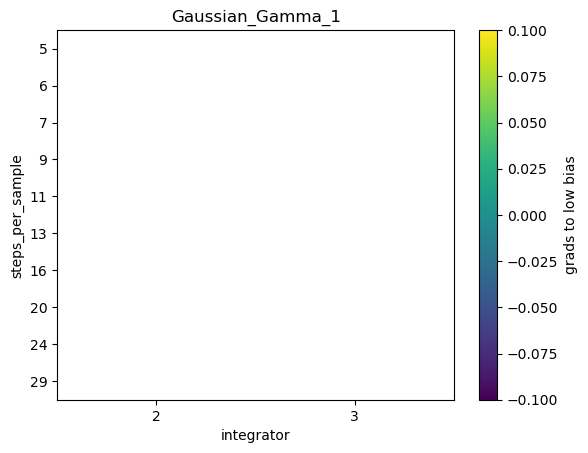

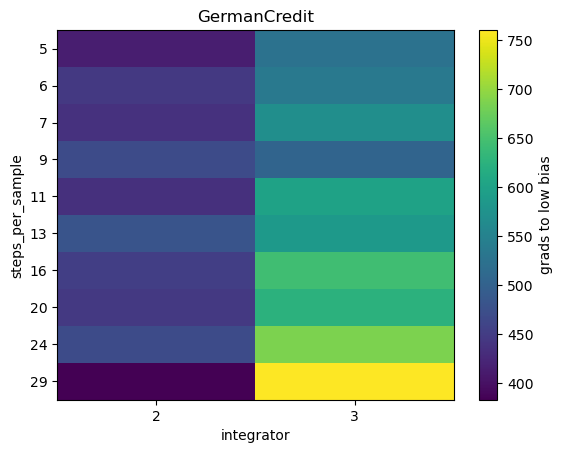

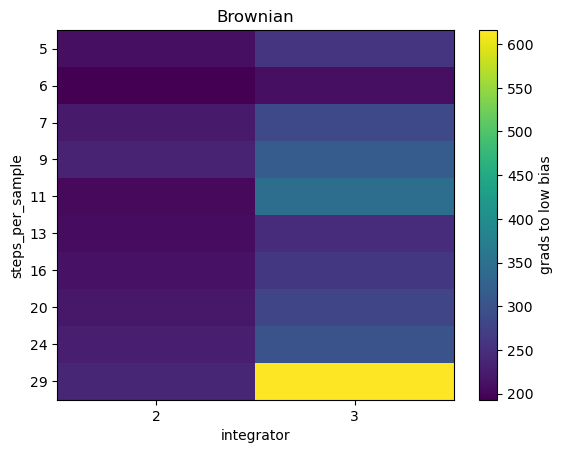

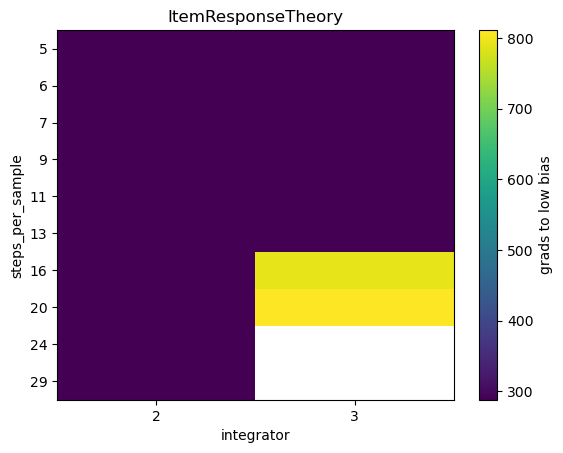

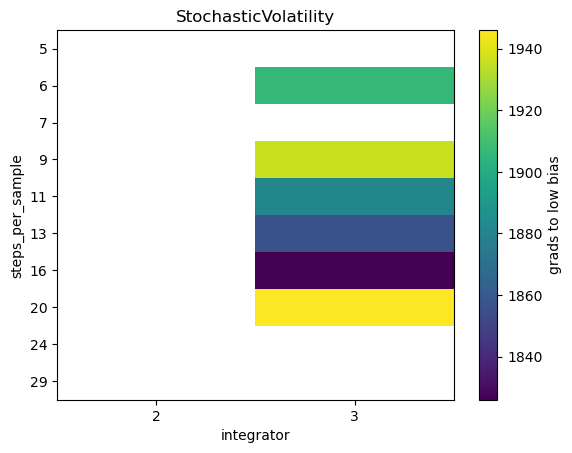

In [11]:
showw('integrator', 'steps_per_sample')

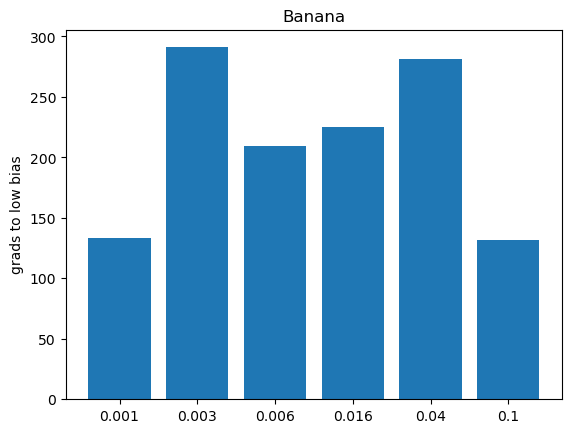

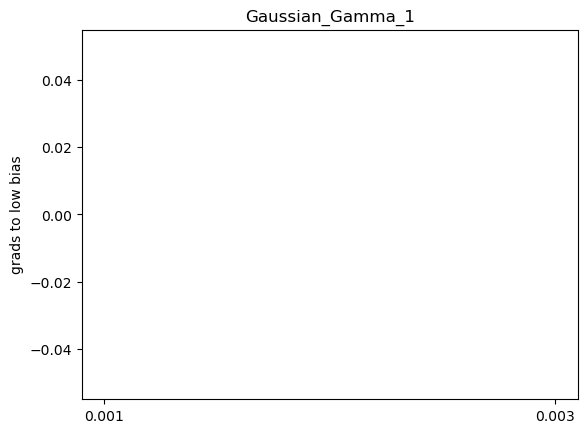

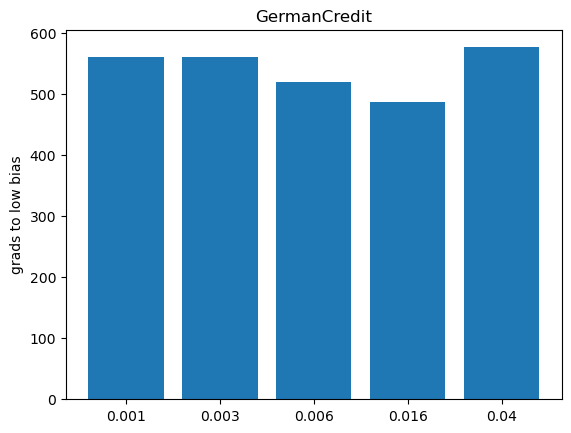

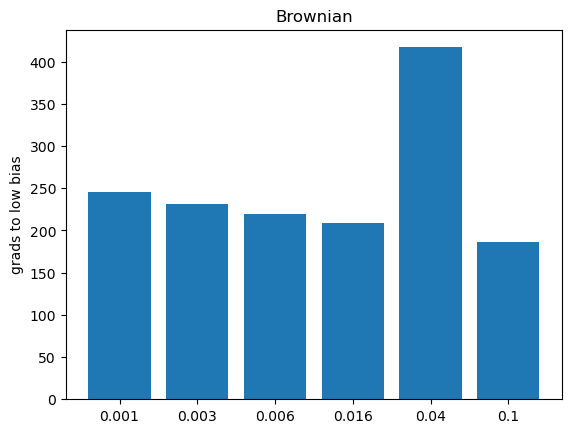

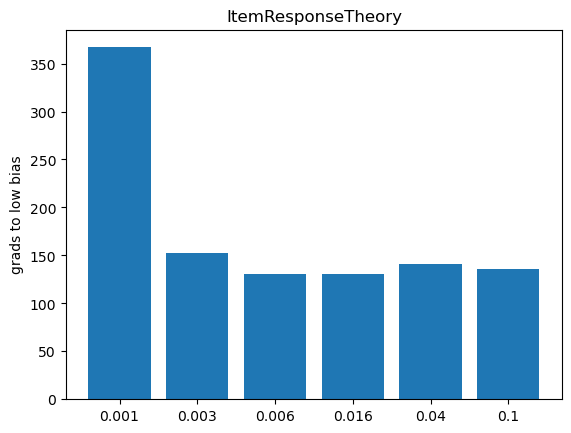

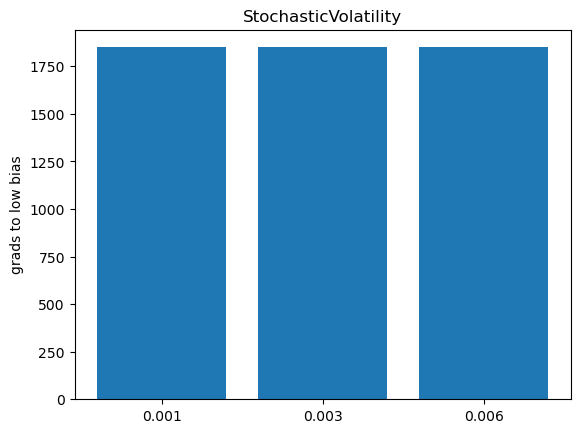

In [12]:
showw('r_end')

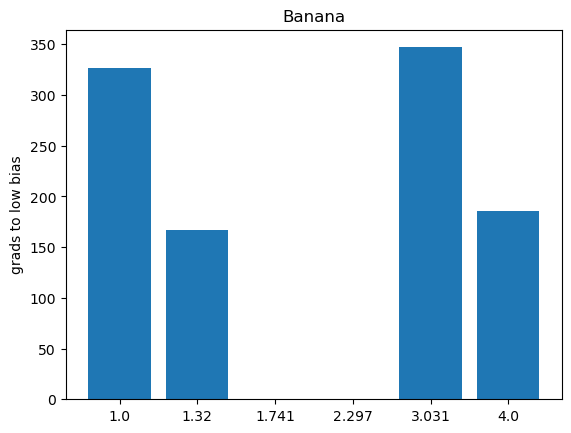

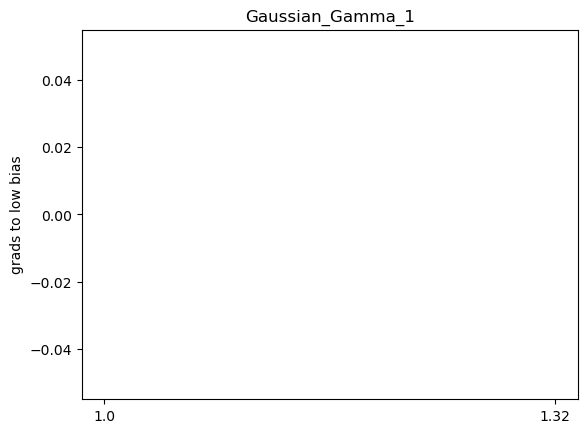

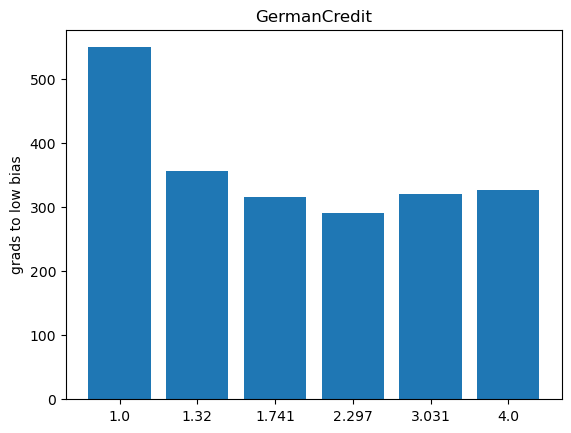

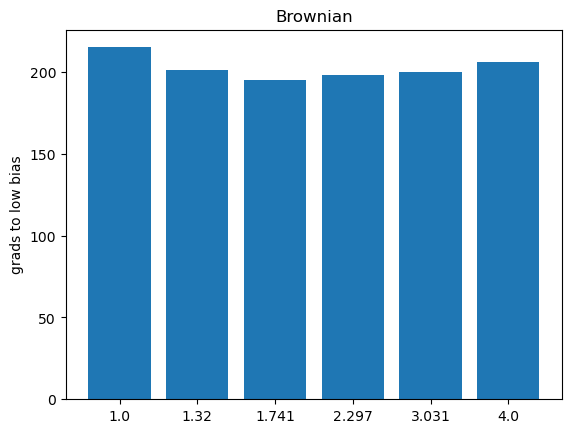

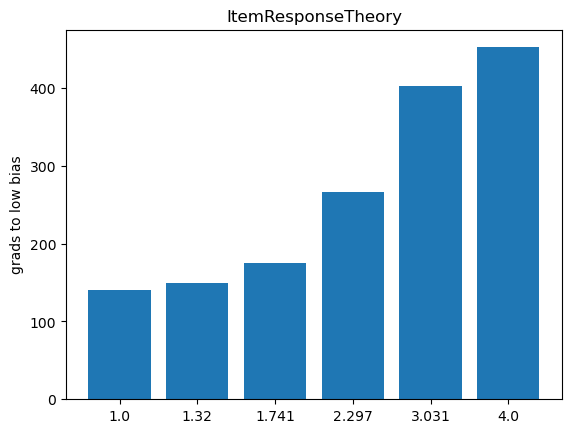

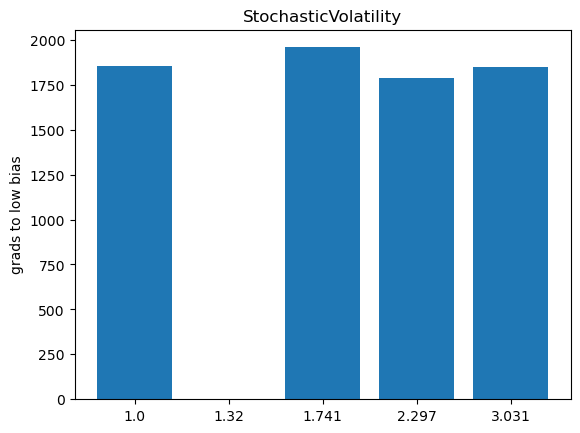

In [3]:
showw('alpha')


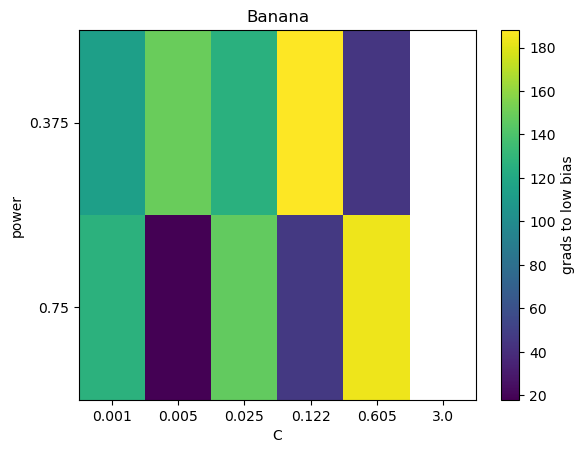

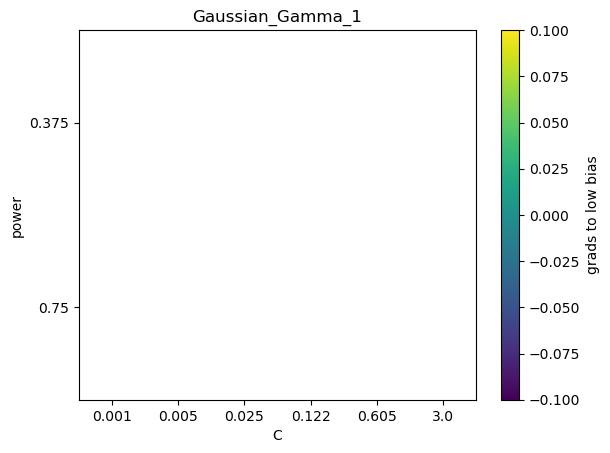

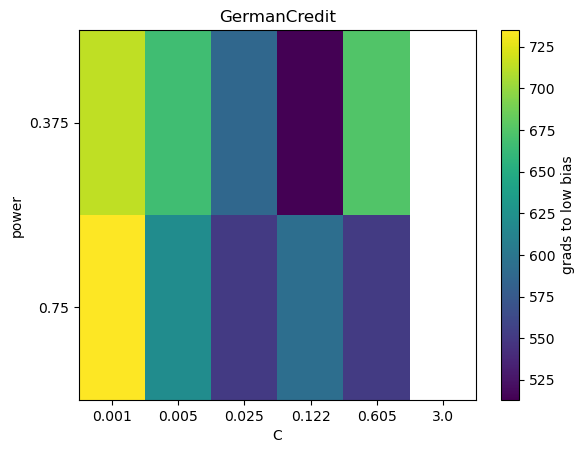

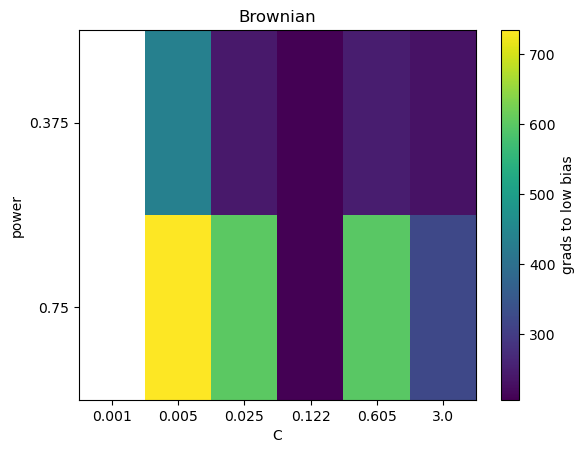

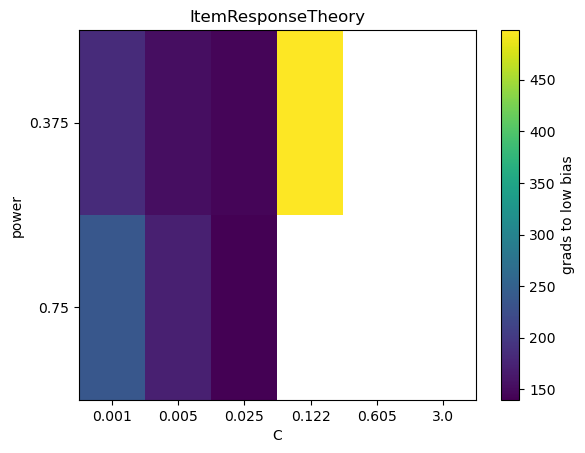

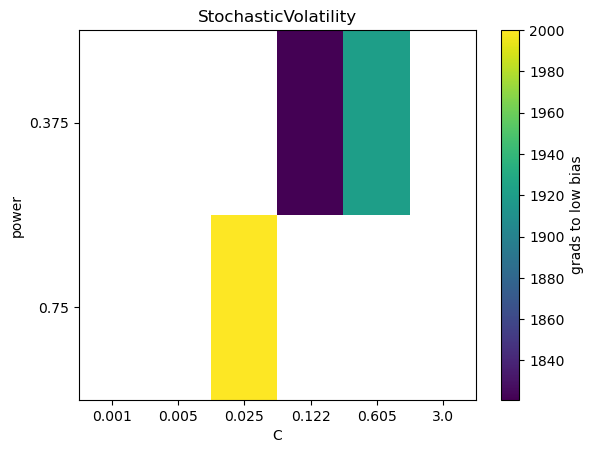

In [4]:
x= 'C'
y = 'power'

df = pd.read_csv('img/' + str(x) + '_' + str(y) + '/data.csv', sep= '\t')

for t in names:
    plt.title(t)
    pandas_matshow(df, x, y, 'grads_to_low_bmax_' + t)

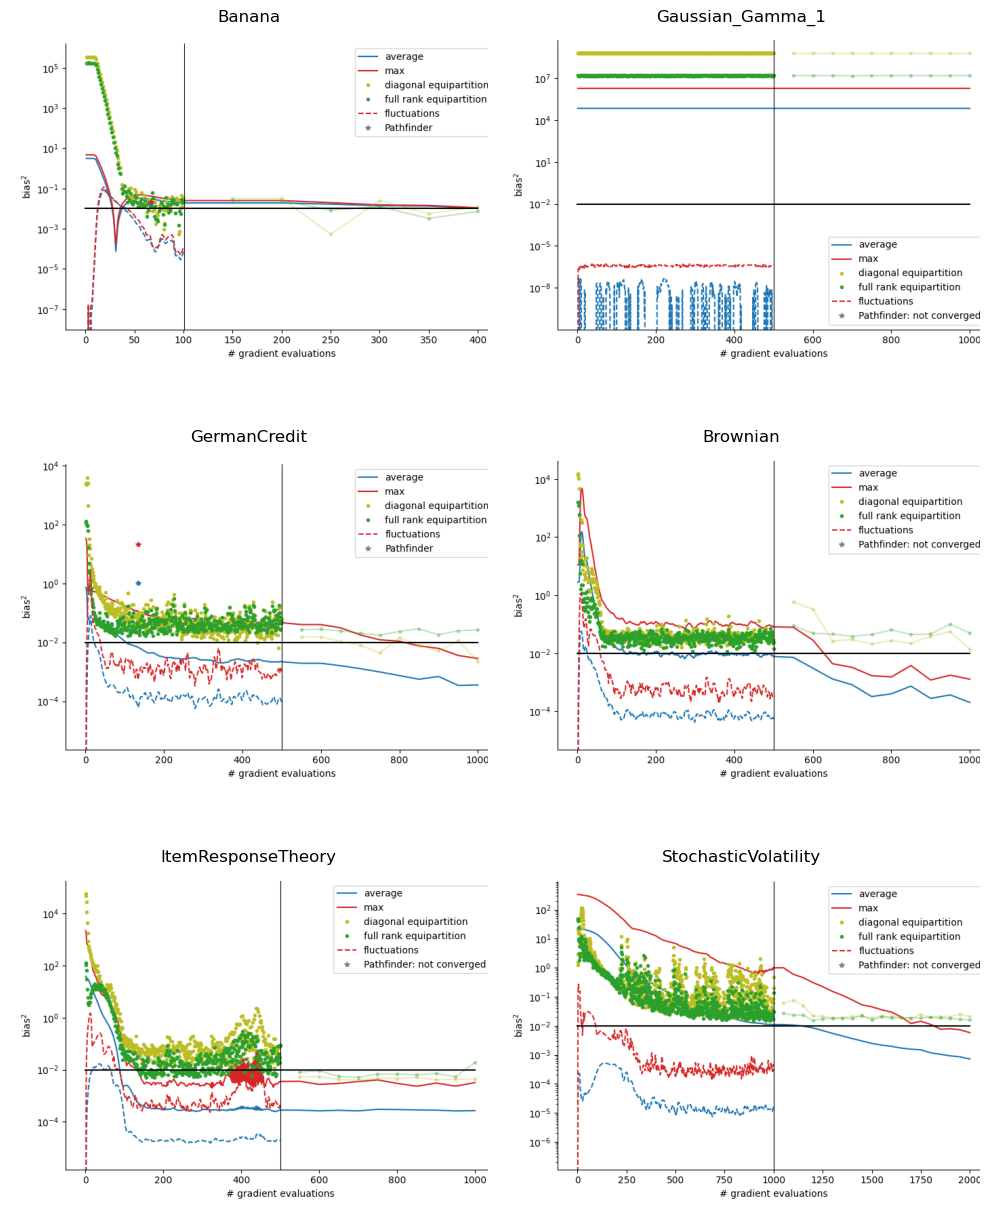

In [ ]:


def showImagesHorizontally(list_of_files):
    fig = plt.figure(figsize = (10, 13))
    number_of_files = len(list_of_files)
    for i in range(number_of_files):
        a=fig.add_subplot(3, 2, i+1)
        image = imread(list_of_files[i])
        plt.imshow(image,cmap='Greys_r')
        plt.title(names[i])
        xlim = plt.gca().get_xlim()
        plt.xlim(xlim[0], 0.47 * xlim[1])
        plt.axis('off')

    plt.tight_layout()
    plt.show()
        

#folder= 'img/bias_grid8/chains=4096_alpha=1.0_bias_type=3_C=0.1_early_stop=0_diagonal_preconditioning=1_integrator=2_steps_per_sample=10_acc_prob=0.9/'
folder = 'img/steps10/chains=4096_alpha=1.0_bias_type=0_C=1_early_stop=0_diagonal_preconditioning=1_integrator=2_steps_per_sample=10_acc_prob=0.9/'

files = [folder + name + '.png' for name in names]


showImagesHorizontally(files)



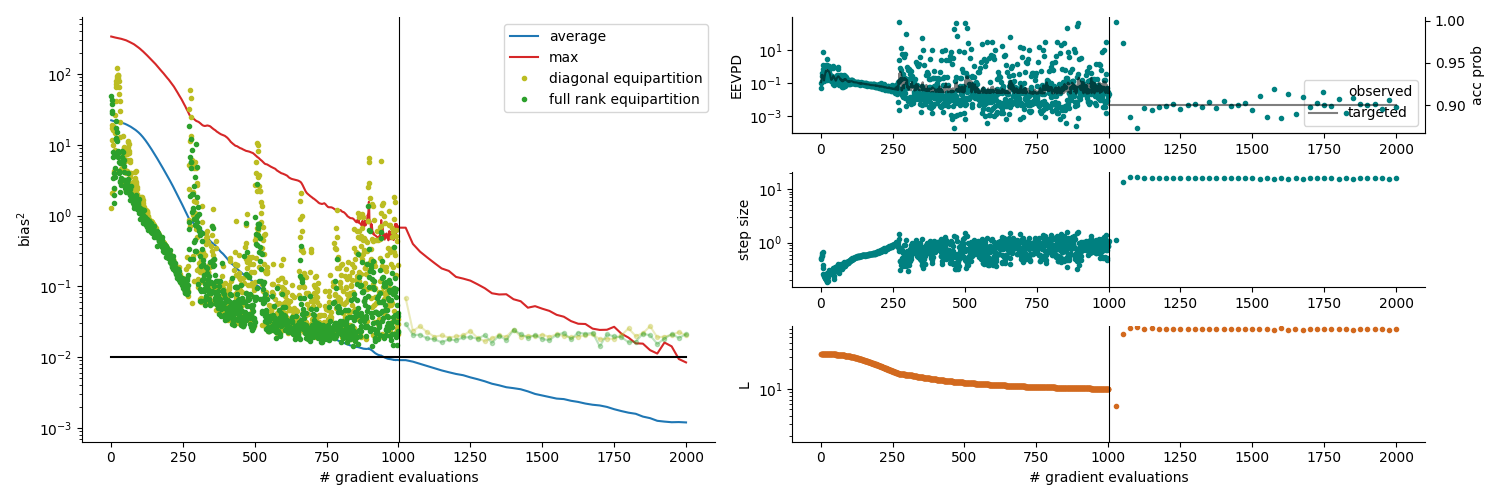

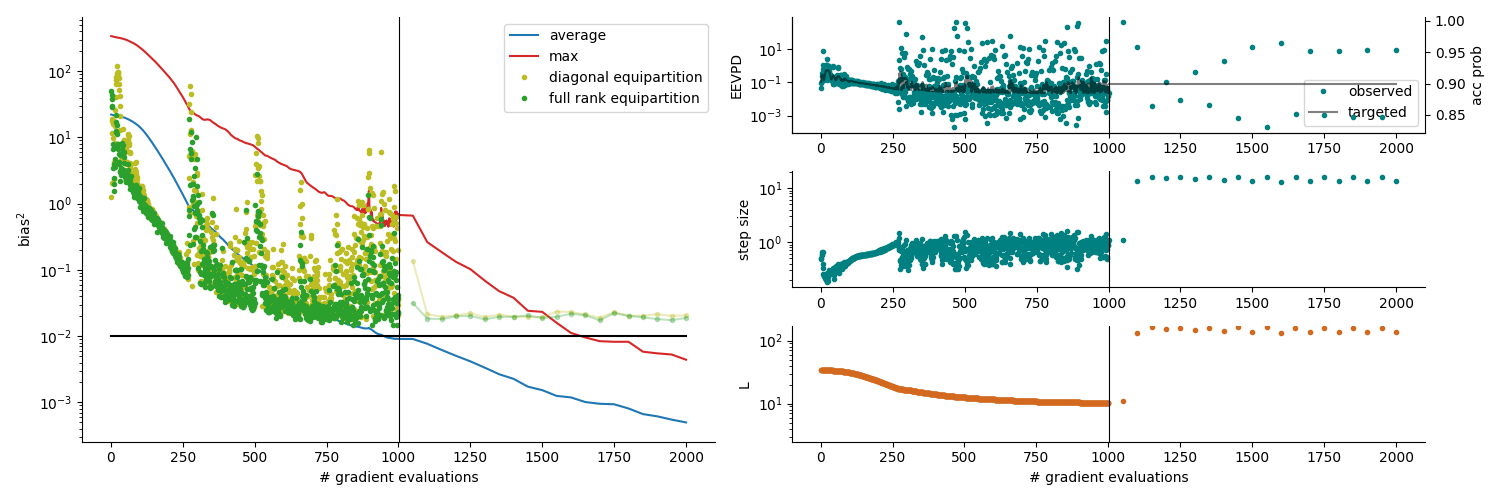

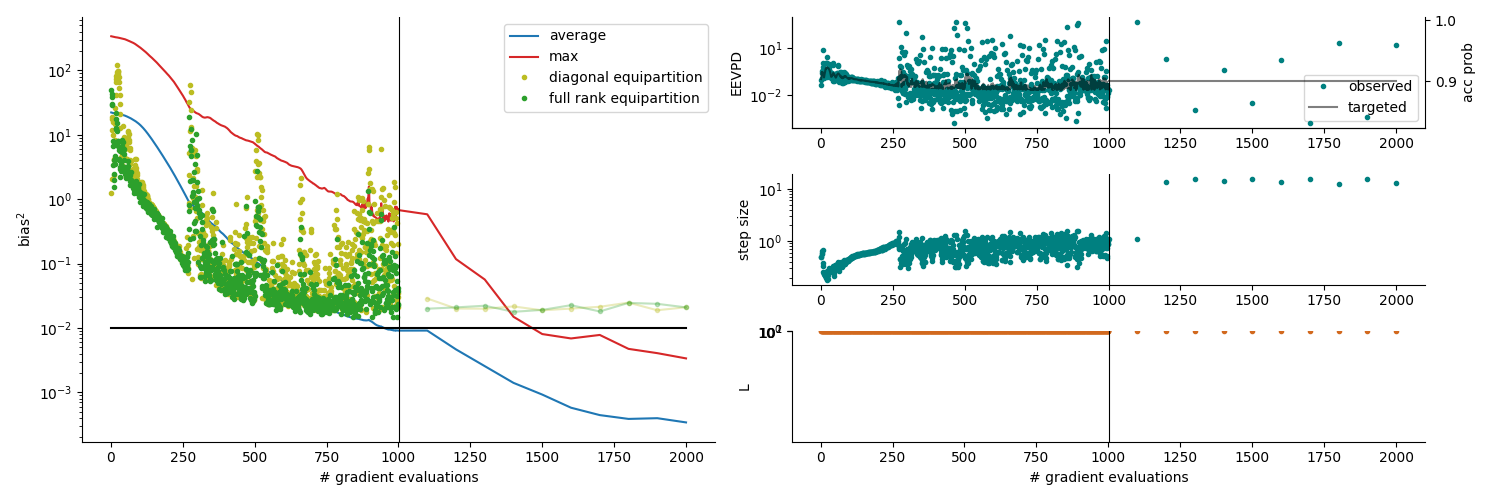

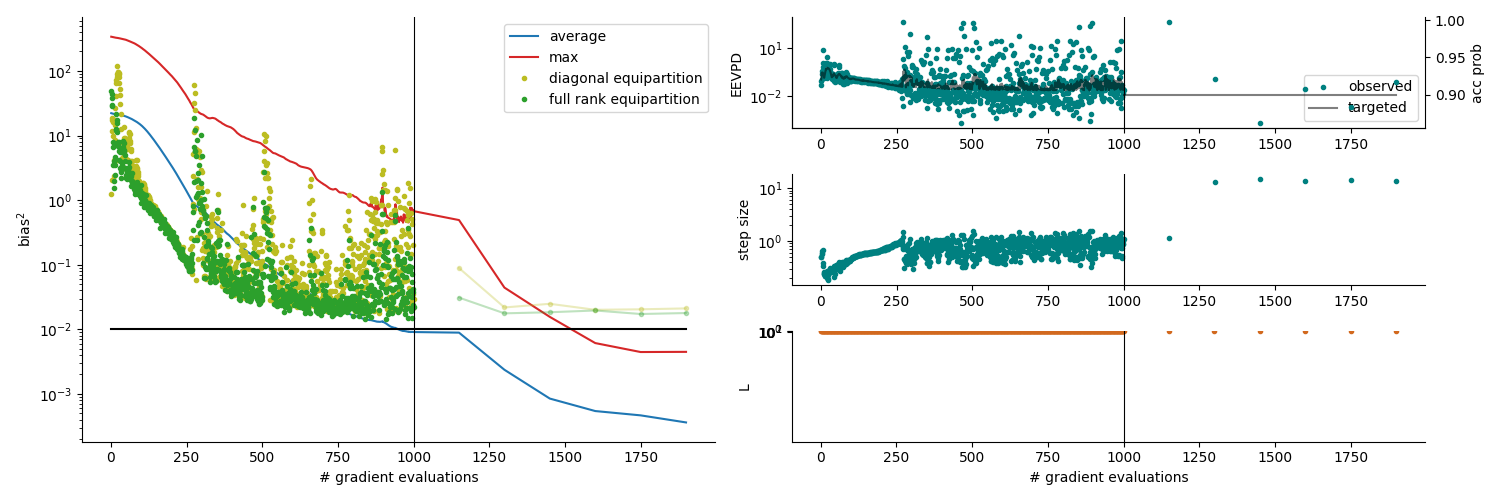

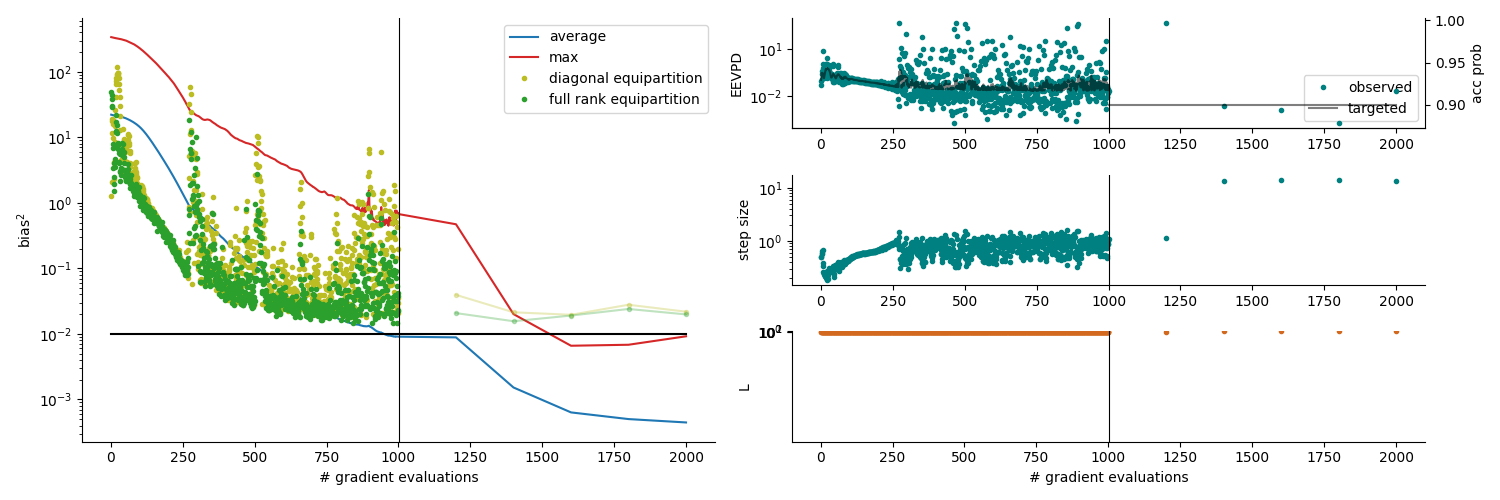

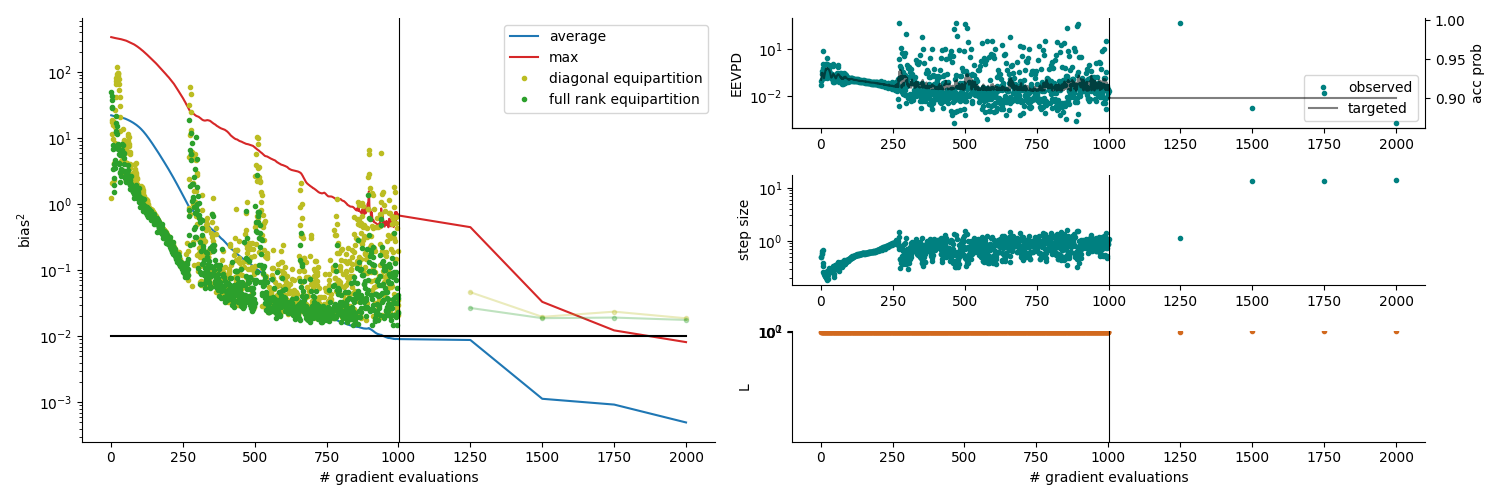

In [ ]:


def f(chain_power= 12, integrator= 2, diag_precond= 1, early_stop=1, acc_rate= 5, steps_per_sample= 10, equi_full= 0):    
    dir = 'img/adjusted_grid/' + 'chainpower' + str(chain_power) + '_integrator' + str(integrator) + '_precond'+str(diag_precond)+'_earlystop'+str(early_stop)+ '_acc_rate' + str(acc_rate)+ '_N' + str(steps_per_sample) + '_equi_full' + str(equi_full)+ '/'
    display(Image(filename= dir + 'StochasticVolatility.png'))
    
    
i=2

for N in [5, 10, 20, 30, 40, 50]:
    f(integrator=i, early_stop=0, steps_per_sample=N, acc_rate=[0, 1, 5][i])
    

# for a in range(8):
#     f(integrator=i, early_stop=0, steps_per_sample= 10, acc_rate= 5)
    